# Entendendo o funcionamento do Geopandas

In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd

## Fonte de dados

ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/

In [2]:
rj = gpd.read_file('../Dados/33MUE250GC_SIR.shp')

In [3]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [4]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


<AxesSubplot:>

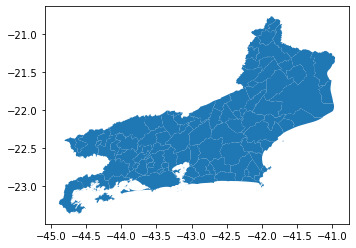

In [5]:
rj.plot()

<AxesSubplot:>

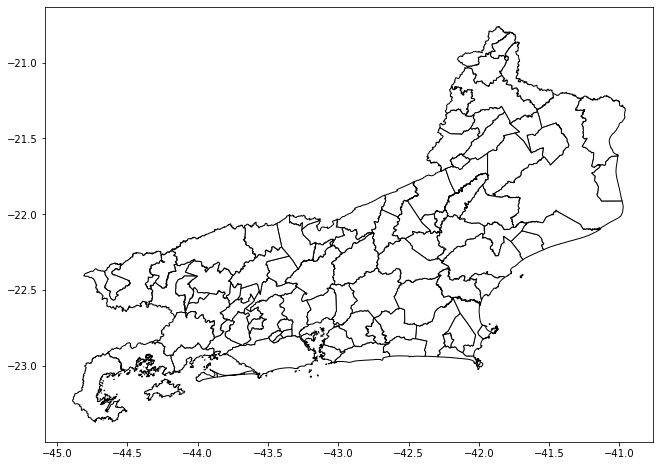

In [6]:
rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

In [7]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

In [8]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

p4 = LineString([(0, 1), (3, 0), (1, 1)])
p5 = Point(0.5, 0.5)

p6 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
p7 = Polygon([(1, 1), (1.5, 0.6), (2, 1)])

p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

<AxesSubplot:>

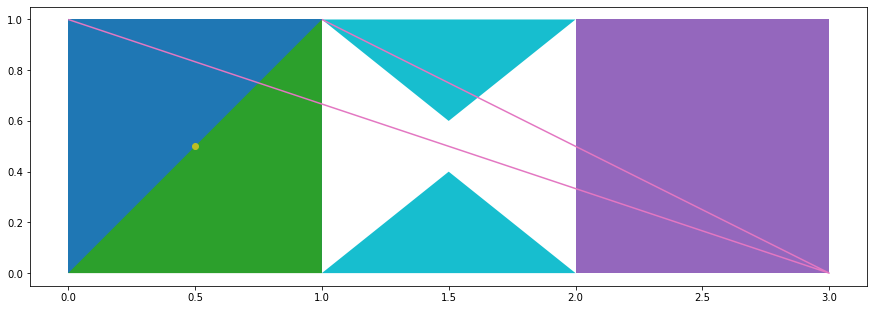

In [9]:
g.plot(cmap = 'tab10', figsize = (15, 8))

<AxesSubplot:>

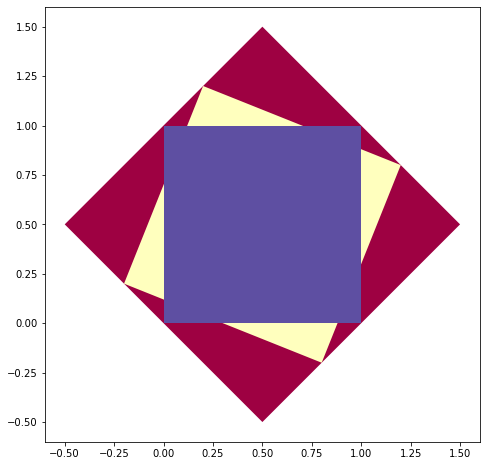

In [10]:
figuras = []
for i in [0.5, 0.2, 0]:
    figuras.append(Polygon([(0 - i, 0 + i),
                            (1 - i, 0 - i),
                            (1 + i, 1 - i),
                            (0 + i, 1 + i)]))

g = gpd.GeoSeries(figuras)
g.plot(cmap='Spectral', figsize=(15,8))

<AxesSubplot:>

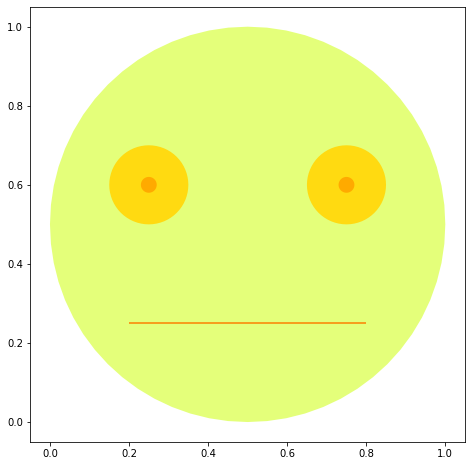

In [11]:
p1 = Point(0.5, 0.5).buffer(0.5)
p2 = MultiPolygon([Point(0.25, 0.6).buffer(0.1), 
                    Point(0.75, 0.6).buffer(0.1)])
p3 = MultiPolygon([Point(0.25, 0.6).buffer(0.02),
                    Point(0.75, 0.6).buffer(0.02)])
p4 = LineString([(0.2, 0.25), (0.8, 0.25)])

g = gpd.GeoSeries([p1, p2, p3, p4])
g.plot(cmap='Wistia', figsize=(15,8))

<AxesSubplot:>

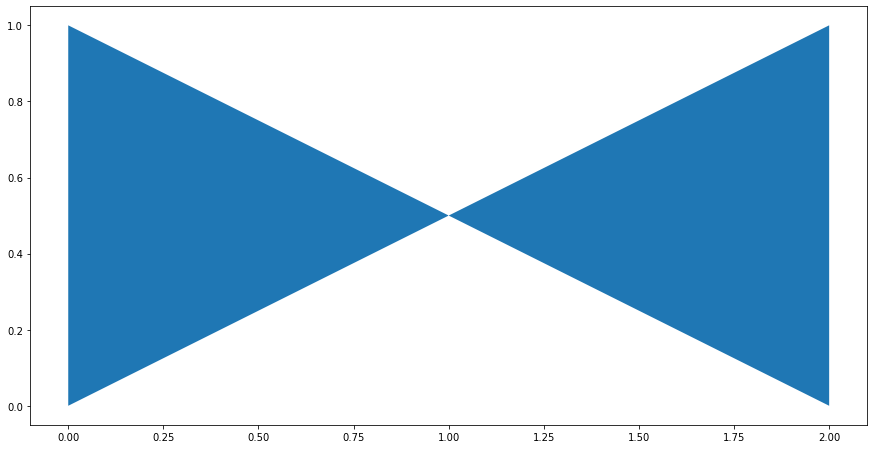

In [12]:
p1 = Polygon([(0, 0), (2, 1), (2, 0), (0, 1)])

g = gpd.GeoSeries([p1])
g.plot(cmap='tab10', figsize=(15,8))

# Criando Shapefiles 

## Obtendo

ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/

## Lendo

<AxesSubplot:>

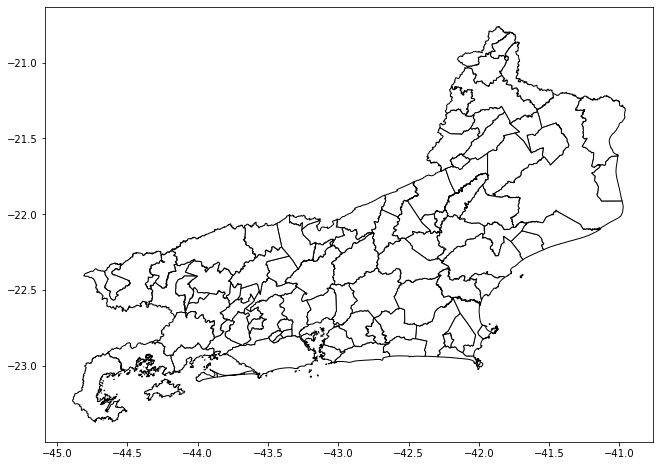

In [13]:
rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

## Modificando 

In [14]:
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


<AxesSubplot:>

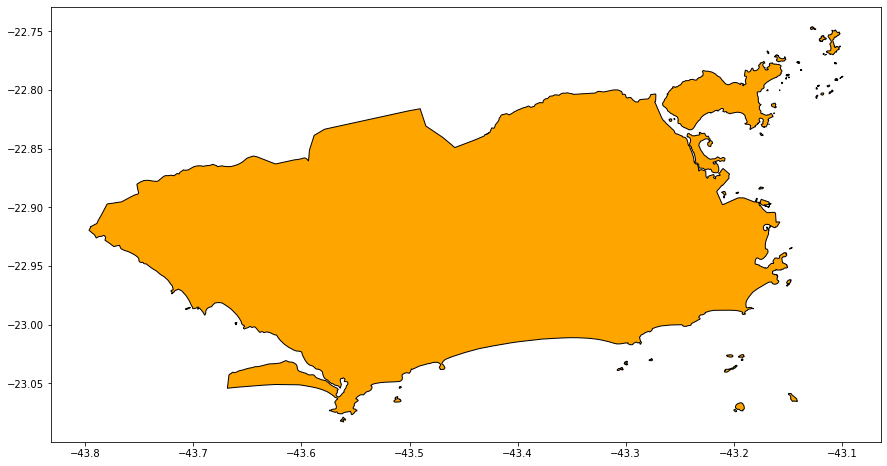

In [15]:
rj.plot(color = 'orange', edgecolor = 'black', figsize = (15, 8))

## Salvando

In [16]:
import os 

dir = '../Dados/RJ-MUNIC'
if not os.path.exists(dir):
    os.makedirs(dir)

In [17]:
rj.to_file(dir + '/RJ-MUNIC.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Tranformando DataFrame em GeoDataFrame 

In [18]:
dados = pd.read_table('../Dados/dados.txt')

In [19]:
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


In [20]:
type(dados)

pandas.core.frame.DataFrame

In [21]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [22]:
geometry

 ...]

In [23]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

In [24]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [25]:
type(geo_dados)

geopandas.geodataframe.GeoDataFrame

In [26]:
dir_2 = '../Dados/RJ-DATASET'
if not os.path.exists(dir_2):
    os.makedirs(dir_2)

In [27]:
geo_dados.to_file(dir_2 + '/dataset.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

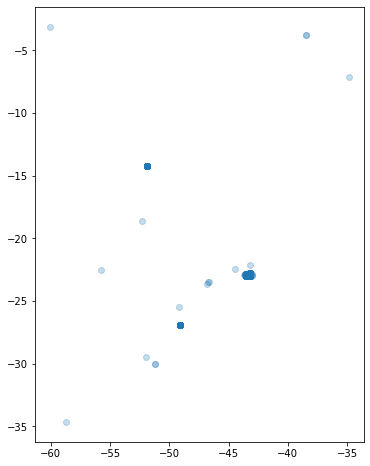

In [28]:
geo_dados.plot(figsize=(15, 8), alpha = 0.25)

# Modificando o CRS dos Arquivos do Projeto 

In [29]:
rj.crs

<Geographic 2D CRS: GEOGCS["SIRGAS 2000",DATUM["D_SIRGAS2000",SPHEROID ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_SIRGAS2000
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [30]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [32]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [33]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [34]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [35]:
rj.to_file(dir + '/RJ-MUNIC.shp')
geo_dados.to_file(dir_2 + '/dataset.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Selecionando pontos dentro de uma região 

<AxesSubplot:>

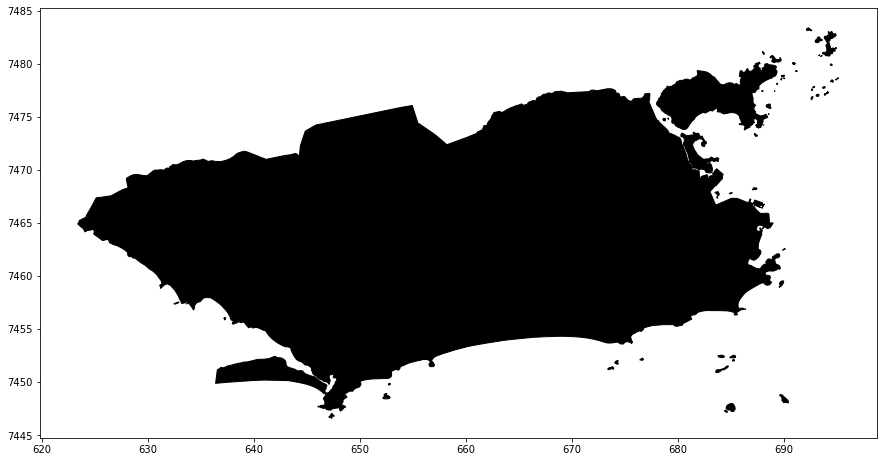

In [36]:
rj.plot(color = 'black', edgecolor = 'black', figsize = (15, 8))

<AxesSubplot:>

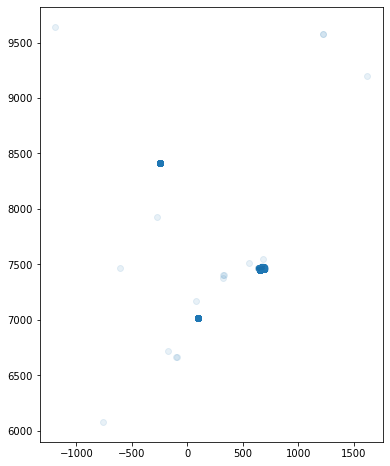

In [37]:
base = rj.plot(color = 'black', edgecolor = 'black', figsize = (15, 8))
geo_dados.plot(ax = base, figsize = (15, 8), alpha = 0.1)

In [38]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [39]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 67, dtype: object

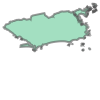

In [40]:
rj.iloc[0].geometry

In [41]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                      -23.016455
Longitude                                     -43.462946
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

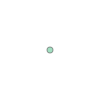

In [42]:
geo_dados.iloc[0].geometry

In [43]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [44]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [45]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

<AxesSubplot:>

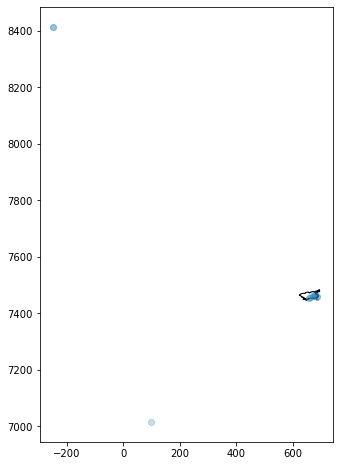

In [46]:
amostra = geo_dados.iloc[:12]

base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))
amostra.plot(ax = base, figsize = (15, 8), alpha = 0.25)

In [47]:
antes = geo_dados.shape[0]
antes

5000

In [48]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]
depois = geo_dados.shape[0]
depois

4513

In [49]:
antes - depois

487

<AxesSubplot:>

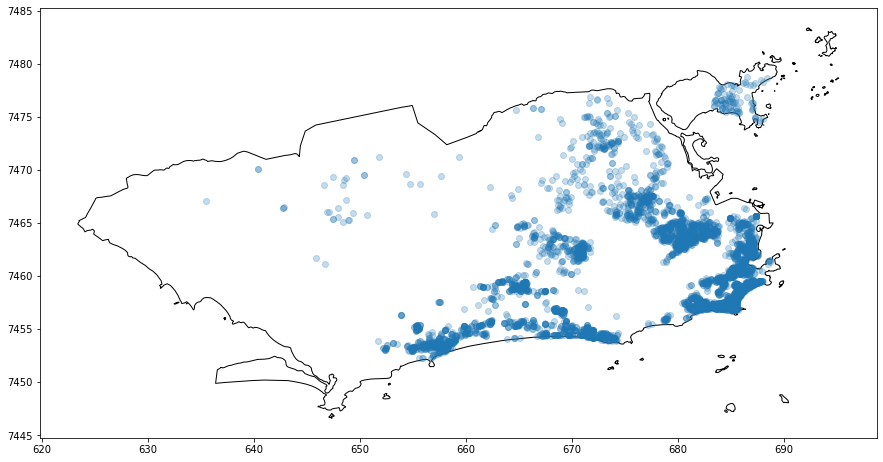

In [50]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))
geo_dados.plot(ax = base, figsize = (15, 8), alpha = 0.25)

In [51]:
geo_dados.to_file(dir_2 + '/dataset.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Obtendo distâncias

## Distância até a estação de metrô mais próxima

### Fontes de dados

https://www.data.rio

https://www.data.rio/datasets/7a0b22723c5a458faaae79f046163504_19/explore?location=-22.895574%2C-43.269600%2C12.81

https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [133]:
metro = gpd.read_file('../dados/Transporte-Vegetacao-UsoDoSolo/Transporte/Metrô/Estações_Metrô.geojson')

In [134]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [54]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [56]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [57]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


<AxesSubplot:>

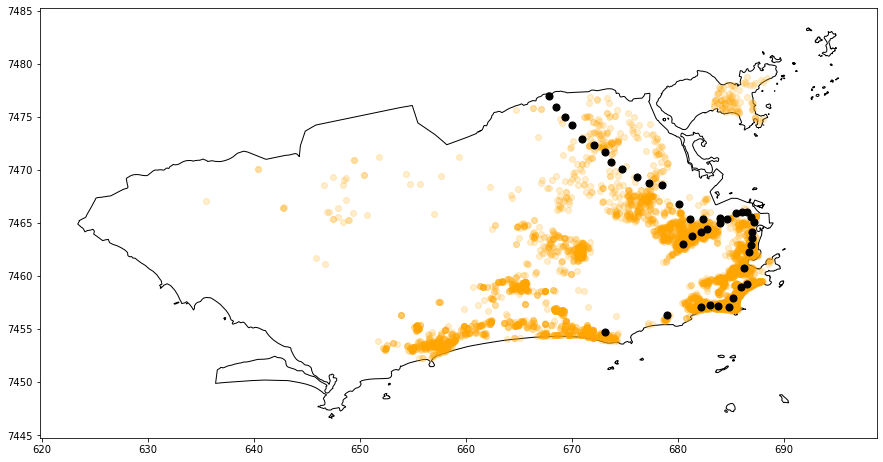

In [58]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)

In [59]:
distance = metro.distance(geo_dados.iloc[0].geometry)

In [60]:
type(distance)

pandas.core.series.Series

In [61]:
distance

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [62]:
distance.min()

15.62293882499506

In [63]:
geo_dados['Dist_metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

C:\Users\thall\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [64]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248


In [65]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [66]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_metro'])

In [67]:
coef

-0.19564083161686907

In [68]:
geo_dados.to_file(dir_2 + '/dataset.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Exercício

In [69]:
distancias_ex = pd.DataFrame({'Latitude': [-22.9531,-23.0278, -22.8463, -22.8969],
                          'Longitude': [-43.1884, -43.4665, -43.3007, -43.3165]})
distancias_ex

,Latitude,Longitude
0,-22.9531,-43.1884
1,-23.0278,-43.4665
2,-22.8463,-43.3007
3,-22.8969,-43.3165


In [70]:
geometry_exercicio = [Point(x) for x in zip(distancias_ex.Longitude, distancias_ex.Latitude)]

In [71]:
ex = gpd.GeoDataFrame(distancias_ex, geometry = geometry_exercicio, crs = {'init': 'epsg:4326', 'units': 'km'})
ex.head()

C:\Users\thall\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (-43.18840 -22.95310)
1,-23.0278,-43.4665,POINT (-43.46650 -23.02780)
2,-22.8463,-43.3007,POINT (-43.30070 -22.84630)
3,-22.8969,-43.3165,POINT (-43.31650 -22.89690)


In [72]:
ex.crs

<Geographic 2D CRS: +init=epsg:4326 +units=km +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
metro_ex = metro.to_crs({'init': 'epsg:4326', 'units': 'km'})
metro_ex.crs

C:\Users\thall\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4326 +units=km +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
ex = ex.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro_ex = metro_ex.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')


In [75]:
metro_ex.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


In [76]:
ex['Metro_perto'] = ex.geometry.apply(lambda x: metro_ex['Nome'].iloc[metro.distance(x).idxmin()])
ex['Dist_min'] = ex.geometry.apply(lambda x: round(metro.distance(x).min(),2))
ex['Metro_longe'] = ex.geometry.apply(lambda x: metro_ex['Nome'].iloc[metro.distance(x).idxmax()])
ex['Dist_max'] = ex.geometry.apply(lambda x: round(metro.distance(x).max(), 2))

In [77]:
ex.head()

,Latitude,Longitude,geometry,Metro_perto,Dist_min,Metro_longe,Dist_max
0,-22.9531,-43.1884,POINT (685.741 7460.527),Botafogo,0.51,Pavuna,24.31
1,-23.0278,-43.4665,POINT (657.136 7452.580),Jardim Oceânico,16.12,Cinelândia,32.51
2,-22.8463,-43.3007,POINT (674.361 7472.491),Vicente de Carvalho,1.53,Ipanema / General Osório,18.65
3,-22.8969,-43.3165,POINT (672.676 7466.906),Engenho da Rainha,3.77,Cardeal Arcoverde,15.80


# Agregando outros tipos de transporte

## Estações de Trem

In [78]:
trem = gpd.read_file('../Dados/Transporte-Vegetacao-UsoDoSolo/Transporte/Trem/Estações_Trem.geojson')

In [79]:
trem.head()

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,...,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.44939 -22.76073)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.48895 -22.74415)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.52271 -22.72031)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.55610 -22.71624)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.60606 -22.67875)


In [80]:
trem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<AxesSubplot:>

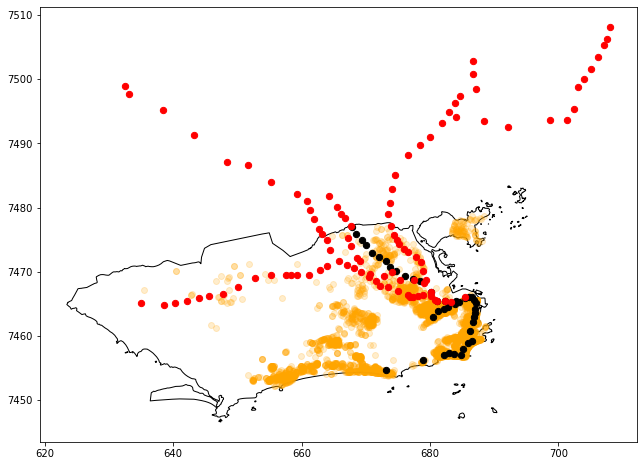

In [82]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 40)
trem.plot(ax=base, color='red', markersize= 40)

In [83]:
trem = trem[trem['geometry'].within(rj.iloc[0].geometry)]

<AxesSubplot:>

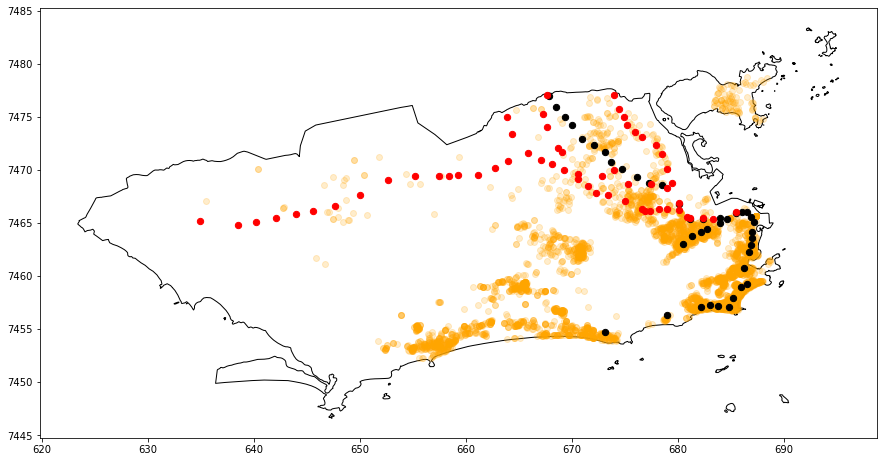

In [84]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 40)
trem.plot(ax=base, color='red', markersize= 40)

## Estações BRT

In [85]:
brt = gpd.read_file('../Dados/Transporte-Vegetacao-UsoDoSolo/Transporte/BRT/Estações_BRT.geojson')

In [86]:
brt

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25244 -22.85513)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.24383 -22.84709)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25824 -22.85743)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27706 -22.84158)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27666 -22.84205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Marechal Fontenelle,1,1,664095.9896,7.468251e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.40065 -22.88602)
157,159,Marechal Mallet,1,1,663615.1812,7.469374e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.40545 -22.87593)
158,160,Magalhães Bastos,1,1,662717.0295,7.470178e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.41429 -22.86876)
159,161,Vila Militar,1,1,664022.2312,7.470841e+06,0,0,0,1,None,None,1.0,0.0,0.0,POINT (-43.40164 -22.86265)


In [87]:
brt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [89]:
brt.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<AxesSubplot:>

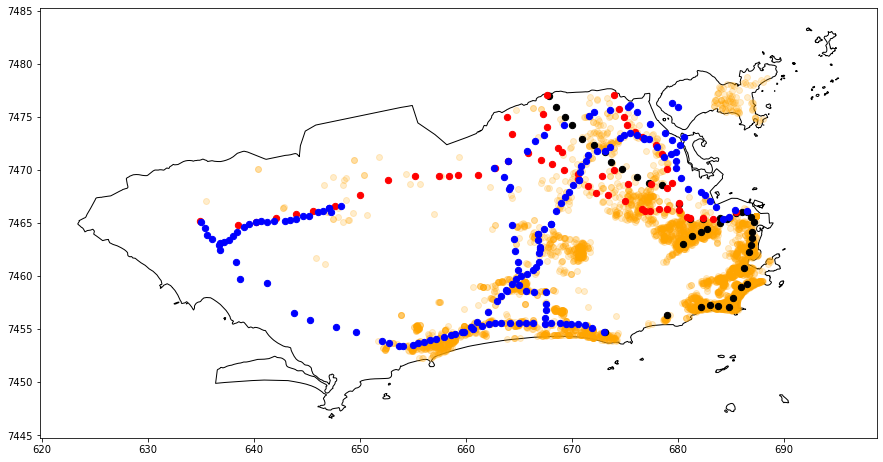

In [90]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 40)
trem.plot(ax=base, color='red', markersize= 40)
brt.plot(ax=base, color='blue', markersize= 40)

In [93]:
transporte = pd.concat([trem['geometry'], metro['geometry'], brt['geometry']], ignore_index = True)
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [94]:
type(transporte)

geopandas.geoseries.GeoSeries

In [95]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [96]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081


In [97]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


## Distância até a praia

In [99]:
praias = gpd.read_file('../Dados/Transporte-Vegetacao-UsoDoSolo/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

In [100]:
praias

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,"POLYGON ((-43.56601 -23.06277, -43.56611 -23.0..."
1,Con,2016-01-01T00:00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,"POLYGON ((-43.59625 -23.04796, -43.59634 -23.0..."
2,Con,2016-01-01T00:00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,"POLYGON ((-43.59737 -23.04845, -43.59754 -23.0..."
3,Con,2016-01-01T00:00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,"POLYGON ((-43.60808 -23.04336, -43.60823 -23.0..."
4,Vg,2016-01-01T00:00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,"POLYGON ((-43.56995 -23.05858, -43.57013 -23.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9934,V2s,2016-01-01T00:00:00,"Floresta Ombrófila Densa, Estágio Médio",121300.632324,2914.467452,29804,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,121300.629955,"POLYGON ((-43.55900 -23.06448, -43.55901 -23.0..."
9935,V2s,2016-01-01T00:00:00,"Floresta Ombrófila Densa, Estágio Médio",76260.648926,2681.657808,29805,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,76260.650001,"POLYGON ((-43.55901 -23.06891, -43.55871 -23.0..."
9936,V2s,2016-01-01T00:00:00,"Floresta Ombrófila Densa, Estágio Médio",8171.828125,388.221884,29806,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,8171.826153,"POLYGON ((-43.56432 -23.06963, -43.56445 -23.0..."
9937,V2s,2016-01-01T00:00:00,"Floresta Ombrófila Densa, Estágio Médio",34221.484375,949.728601,29807,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,34221.485938,"POLYGON ((-43.55524 -23.07054, -43.55513 -23.0..."


In [101]:
praias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [102]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [103]:
praias.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<AxesSubplot:>

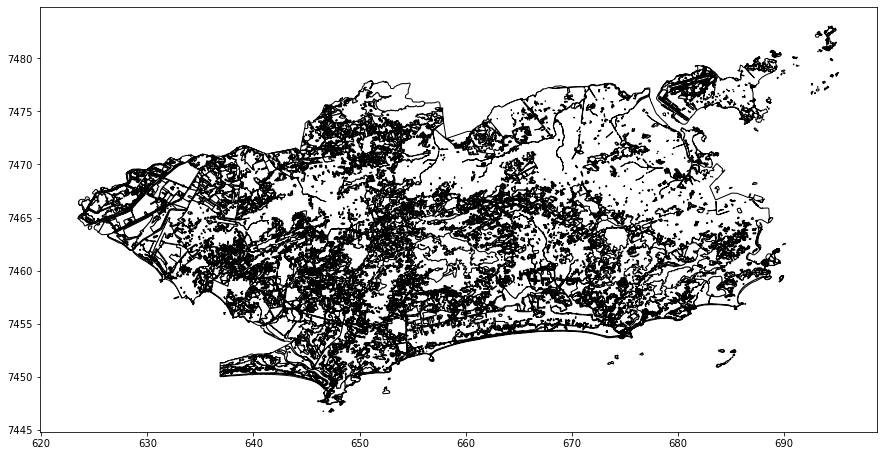

In [104]:
praias.plot(color = 'white', edgecolor = 'black', figsize = (15, 8))

In [106]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [108]:
praias = praias[praias['legenda'] == 'Praia']

<AxesSubplot:>

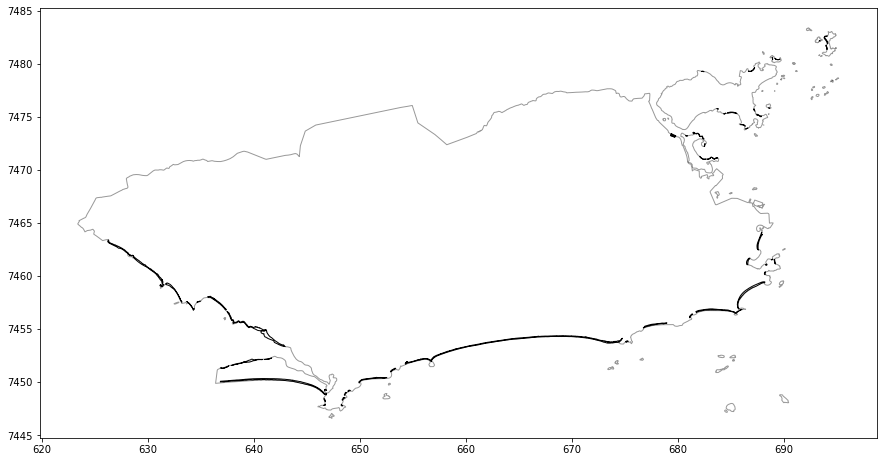

In [110]:
base = rj.plot(color = 'white', edgecolor = 'black', alpha = 0.4, figsize = (15, 8))

praias.plot(ax = base, color = 'white', edgecolor = 'black')

In [111]:
praias

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
21,P,2016-01-01T00:00:00,Praia,3042.035156,257.566546,19891,Outros,Praia,,,3042.036027,"POLYGON ((646.841 7448.837, 646.797 7448.877, ..."
22,P,2016-01-01T00:00:00,Praia,2155.254395,274.902433,19892,Outros,Praia,,,2155.254100,"POLYGON ((646.892 7449.217, 646.889 7449.211, ..."
23,P,2016-01-01T00:00:00,Praia,4818.130371,445.290523,19893,Outros,Praia,,,4818.129025,"POLYGON ((646.756 7449.295, 646.744 7449.264, ..."
24,P,2016-01-01T00:00:00,Praia,943641.800781,20812.992794,19894,Outros,Praia,,,943641.805845,"POLYGON ((640.986 7450.322, 641.073 7450.321, ..."
25,P,2016-01-01T00:00:00,Praia,194036.399902,8011.623950,19895,Outros,Praia,,,194036.398225,"MULTIPOLYGON (((640.042 7452.093, 640.075 7452..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8854,P,2016-01-01T00:00:00,Praia,1700.454590,320.786470,28724,Outros,Praia,,,1700.456496,"POLYGON ((631.242 7459.145, 631.230 7459.141, ..."
8855,P,2016-01-01T00:00:00,Praia,1143.504395,235.546687,28725,Outros,Praia,,,1143.503857,"POLYGON ((631.276 7459.029, 631.272 7459.026, ..."
8856,P,2016-01-01T00:00:00,Praia,1761.695801,465.927712,28726,Outros,Praia,,,1761.696877,"POLYGON ((631.410 7459.008, 631.410 7459.006, ..."
8857,P,2016-01-01T00:00:00,Praia,889.078125,251.133257,28727,Outros,Praia,,,889.078399,"POLYGON ((631.525 7459.152, 631.519 7459.151, ..."


In [112]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [113]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro,Dist_Transporte,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193,1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787,7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470,6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370,3.404589
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605,1.369015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366,16.133493
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492,0.955964
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300,2.612550
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081,7.679812


In [114]:
geo_dados['Valor'].corr(geo_dados['Dist_Praia'])

-0.3615189752936532

In [115]:
geo_dados.to_file(dir_2 + '/dataset.shp')

C:\Users\thall\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\thall\AppData\Local\Temp/ipykernel_32724/441605707.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_dados.to_file(dir_2 + '/dataset.shp')


### Exercício

In [116]:
cidades_rj = gpd.read_file('../Dados/33MUE250GC_SIR.shp')
cidades_rj = cidades_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [119]:
cidades_rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((568.439 7453.686, 568.426 7453..."
1,1469,3300159,APERIBÉ,"POLYGON ((801.294 7605.422, 801.334 7605.414, ..."
2,1470,3300209,ARARUAMA,"POLYGON ((785.286 7498.930, 785.290 7498.929, ..."
3,1471,3300225,AREAL,"POLYGON ((689.675 7543.879, 689.680 7543.894, ..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((809.736 7481.602, 809.875 7481..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((692.212 7553.895, 692.713 7554.052, ..."
88,1556,3306107,VALENÇA,"POLYGON ((621.608 7556.914, 621.627 7556.941, ..."
89,1557,3306156,VARRE-SAI,"POLYGON ((830.245 7692.122, 830.255 7692.130, ..."
90,1558,3306206,VASSOURAS,"POLYGON ((642.960 7532.379, 643.058 7532.369, ..."


In [131]:
rj = cidades_rj[cidades_rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

rj['Munic_Longe'] = rj['geometry'].apply(lambda x: cidades_rj['NM_MUNICIP'].iloc[ cidades_rj.distance(x).idxmax() ])
rj['Dist_Max'] = rj['geometry'].apply(lambda x: "{0:.2f} km".format(cidades_rj.distance(x).max()))

rj[['Munic_Longe', 'Dist_Max']]

C:\Users\thall\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\thall\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Munic_Longe,Dist_Max
67,VARRE-SAI,233.23 km
